In [37]:
import pandas

data = """Année	Financé	Financeur	Octobre2021	Source
1985	6000	Dean’s Fund		CV
1985	150000	Xerox		CV
1985	25000	Brown		CV
1986	1000	Mellon Foundation		CV
1987	520000	Annenberg/CPB		CV
1987	7000	Consortium for Language Learning and Instruction		CV
1987	63000	Consortium for Language Learning and Instruction		CV
1987	30000	Apple		CV
1988	30000	Apple		CV
1988	15000	Apple		CV
1988	48000	Apple		CV
1989	1985000	Annenberg/CPB		CV
1989	15000	Apple		CV
1989	10000	Apple		CV
1990	9800	President Derek		CV
1991	10000	Apple		CV
1991	40000	NEA		CV
1991	27500	NEA		CV
1992	34900	NSF		CV
1993	200000	Getty		CV
1994	200000	NEH		CV
1994	450000	NSF		CV
1996	50000	Mellon Foundation		CV
1996	3000	Provost Office		CV
1996	1000	FRAC		CV
1997	240000	Fund for the Improvement of Postsecondary Education		CV
1997	300000	NEH		CV
1997	30000	NSF		CV
1997	21000	Berger Family Fund		CV
1998	5000	Provost Office		CV
1998	27000	Modern Language Association		CV
1998	2800000	NEH-NSF		NEH-NSF
1999	41000	Berger Family Fund		CV
1996	180000	NEH		CV
1999	280000	Max Planck		CV
2000	20000	Tufts		CV
2000	100000	Max Planck		CV
2001	450000	NSF/DFG		CV
2002	75000	NSF		CV
2002	500000	NSF/EU		CV
2002	22000	NSF/EU		CV
2002	250000	NSDL		CV
2003	250000	Institute for Museum and Library Services		CV
2005	50000	Mellon Foundation		CV
2007	50000	Mellon Foundation		CV
2009	100000	NEH		CV
2010	140000	Mellon Foundation		CV
2008	580000	 Cantus Foundation		CV
2010	40000	Google		CV
2010	75000	Mellon Foundation		CV
2011	360000	IMLS		CV
1999	75000	NEH	75000	NEH
2006	432000	Department of Education	432000	Grants Perseus
2007	285000	NEH	285000	NEH
2007	349939	NEH	349939	NEH
2008	8000	NEH	8000	NEH
2008	119992	NEH	119992	NEH
2008	471000	Mellon Foundation	471000	Grants Perseus
2008	240000	NEH	120000	NEH
2008	865290	Alpheios	865290	Grants Perseus
2009	100000	NEH	100000	NEH
2009	50133	NEH	50133	NEH
2009	281344	NSF		NSF
2010	174828	NEH	174828	NEH
2011	249727	NEH	249727	NEH
2012	30000	NEH	30000	NEH
2017	249359	NEH	249359	NEH
2019	325000	NEH	325000	NEH""".split("\n")
data = list(map(lambda z: [int(x) if x.isnumeric() else x for x in z.split("\t")], data))
data = pandas.DataFrame(data[1:], columns=data[0])

data.Financé = data.Financé / 1e6

def financeur(x):
    if x.strip() in {"Xerox", "Apple", "Google"}:
        return "Entreprise"
    if "Dean" in x or "Provost" in x or "Tuft" in x or "Brown" in x or "President" in x:
        return "Université accueillante ou partenaire"
    if "NEH" in x or "NSF" in x:
        return "NEH, NSF et collaborations NSF"
    if x == "Alpheios":
        return x
    if x in {"NEH", "Annenberg/CPB"}:
        return x
    if "und" in x:
        return "Mellon Foundation et autres fondations"
    else:
        return "Autres"
    
data.Financeur = data.Financeur.apply(financeur)

data = data.sort_values(by=['Financeur'])

Text(2013.5, 2.5, '2013: Humboldt Chair\n à Leipzig')

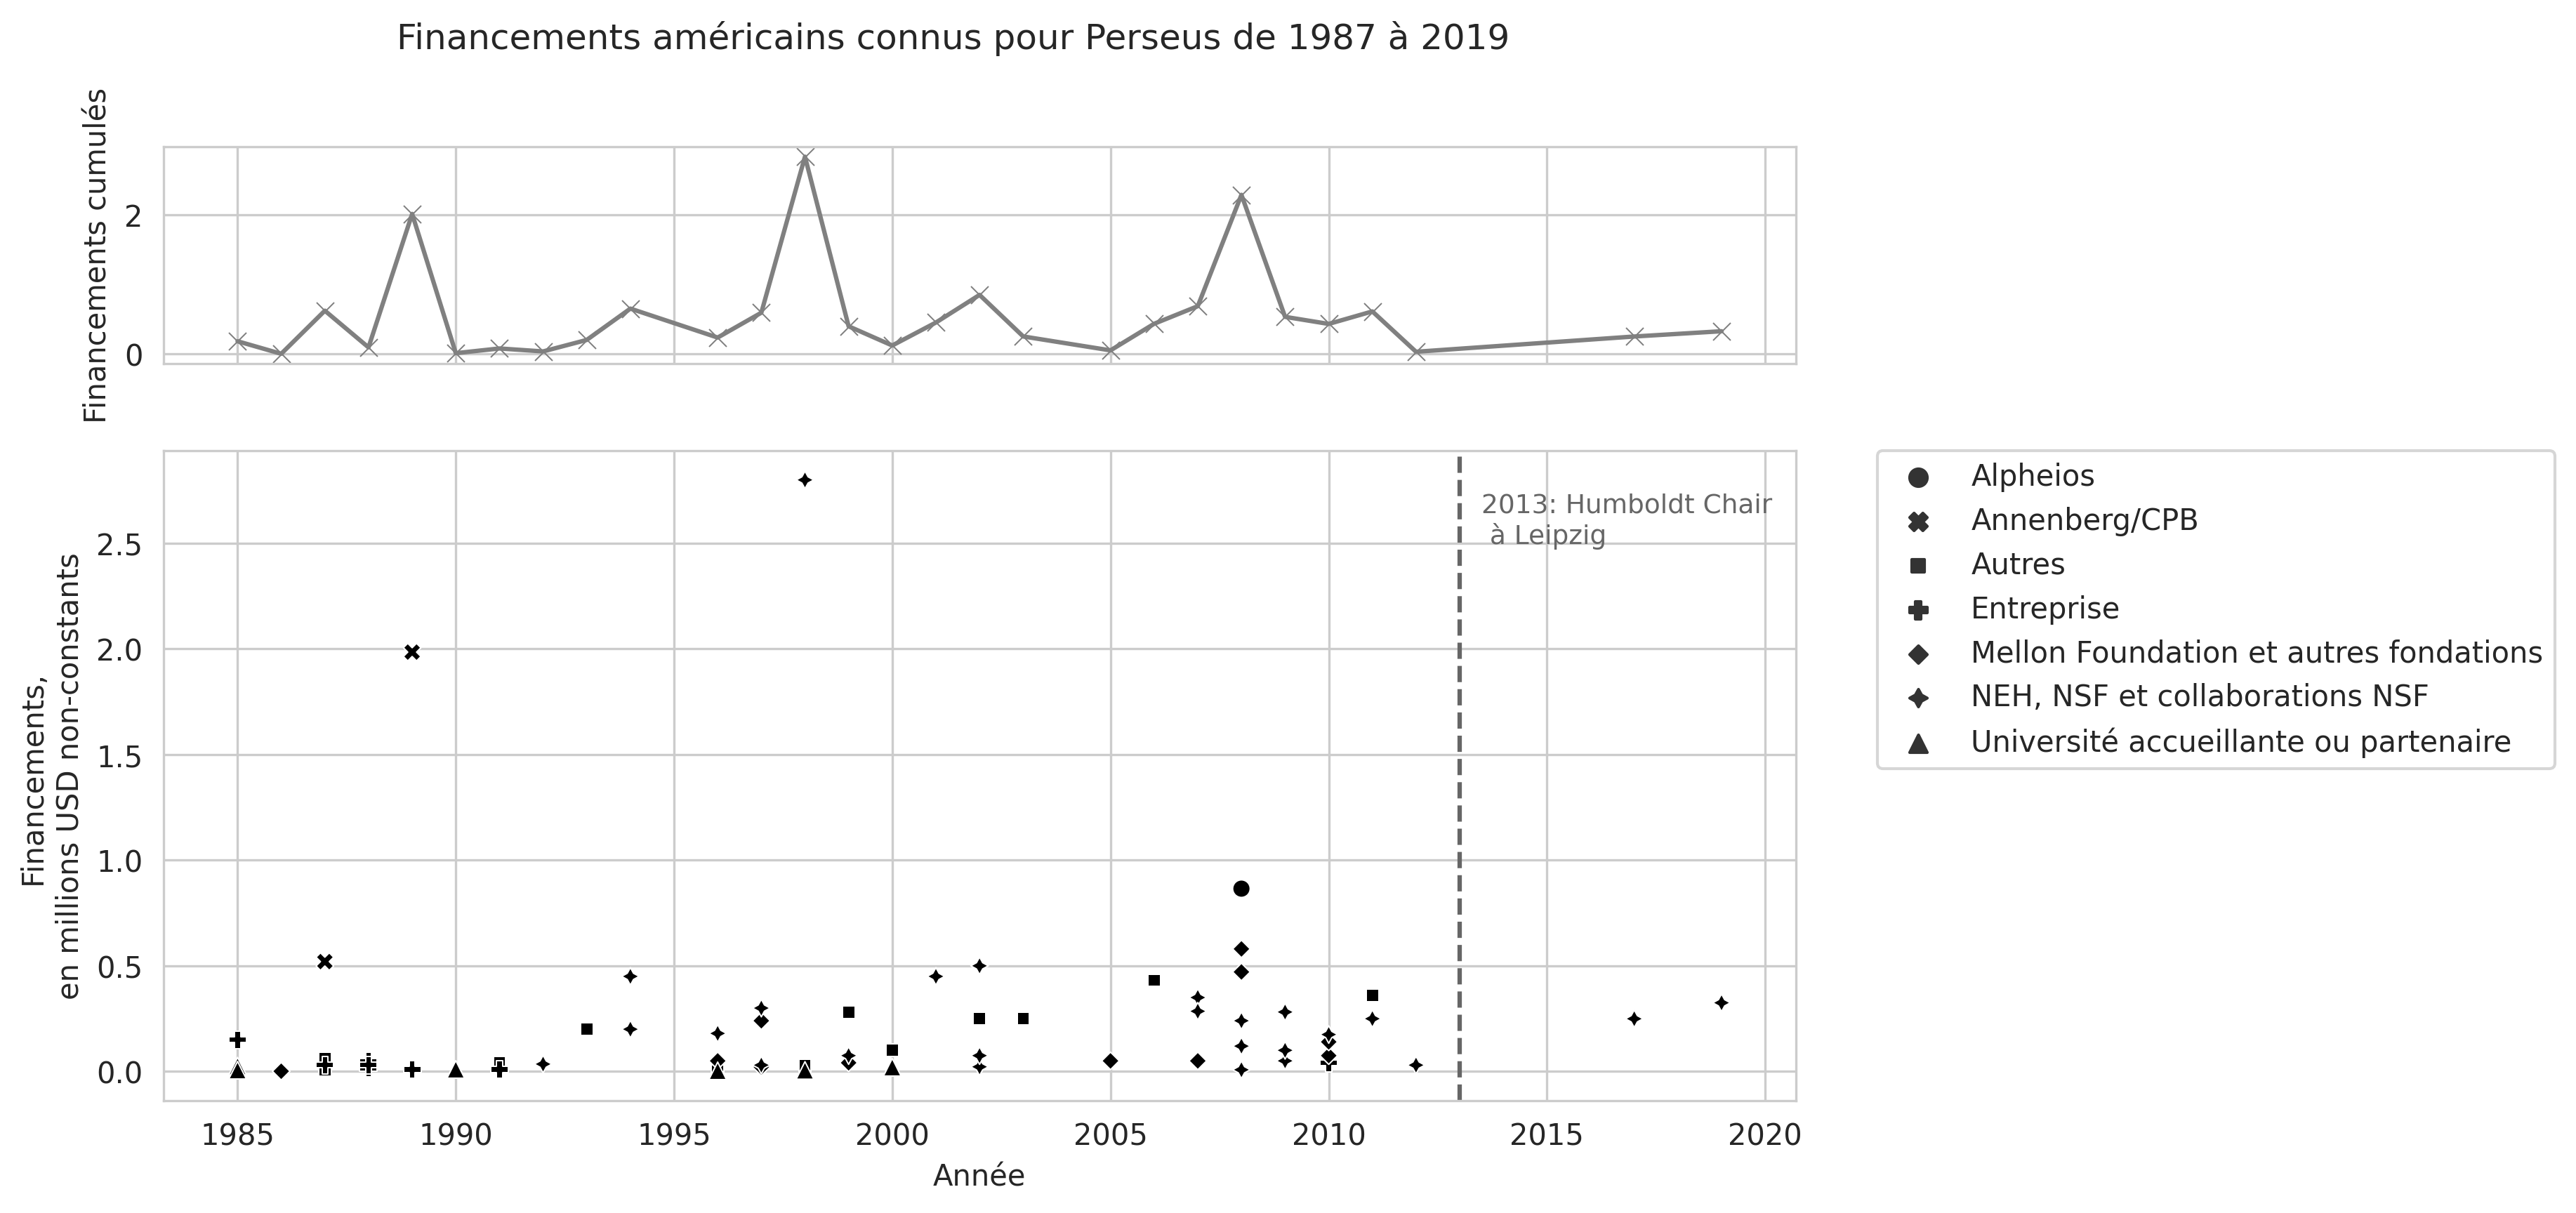

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
mks = itertools.cycle(["o", "v", "^", "<", ">", "s", "*", "p"])
#markers = [next(mks) for i in df["category"].unique()]

sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1, 3]}, dpi=300)
fig.suptitle('Financements américains connus pour Perseus de 1987 à 2019')

summed = data.groupby(['Année'])['Financé'].sum().to_frame().reset_index(level=0)


sns.lineplot(x=summed.Année, y=summed.Financé, ax=ax1, color="gray")
sns.scatterplot(x=summed.Année, y=summed.Financé, ax=ax1, color="gray", marker="x")
ax1.set_ylabel("Financements cumulés")

sns.scatterplot(
    data=data, y=data.Financé, x=data.Année, style=data.Financeur, 
    markers=True, ax=ax2, palette="gray", color="black")



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylabel("Financements, \nen millions USD non-constants")

plt.axvline(2013, 0, 1, linestyle="--", color="#666666")
ax2.text(2013.5, 2.5, '2013: Humboldt Chair\n à Leipzig', fontsize=9, color="#666666")